In [1]:
import json
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras import backend as K
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm
import shap
from keras.preprocessing import image

c:\Users\eagua\anaconda3\envs\Thesis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Model():
    def __init__(self):

        self.model = ResNet50()
        self.input_size = (224, 224)
        
    def run_on_batch(self, x):
        return self.model.predict(x)


def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

model = Model()

img, x = load_img('goldfish.jpg')

In [4]:
print(img)
model = ResNet50(weights="imagenet")

# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

print("Number of ImageNet classes:", len(class_names))
print("Class names:", class_names)

<PIL.Image.Image image mode=RGB size=224x224 at 0x2094177A310>
Number of ImageNet classes: 1000
Class names: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 

In [5]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

print(X[0].shape)
img_array = np.array(img)
print(img_array.shape)


# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", img_array.shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    img_array, max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

(224, 224, 3)
(224, 224, 3)


DimensionError: The length of the image to be masked must match the shape given in the ImageMasker constructor: 224 * 3 != 224 * 224 * 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image shape: (1, 224, 224, 3)


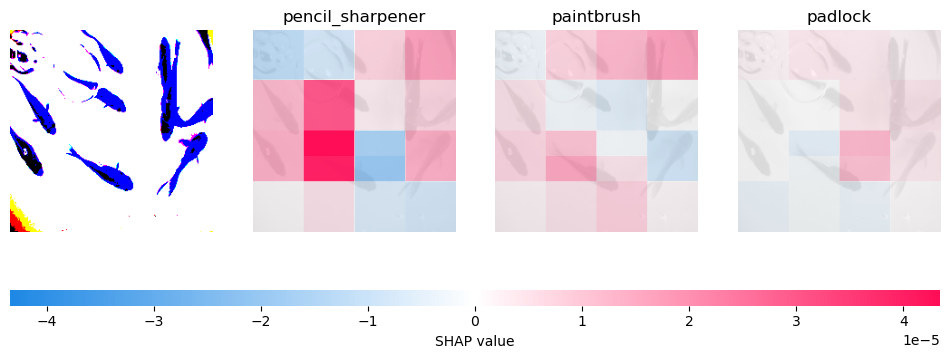

In [9]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from PIL import Image
import shap
import requests

# Load pre-trained model
model = ResNet50(weights="imagenet")

# Getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
class_names = [v[1] for v in requests.get(url).json().values()]

# Python function to get model output; replace this function with your own model function
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# Load and preprocess your image
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Define the masker used to mask out partitions of the input image
masker = shap.maskers.Image("inpaint_telea", (224, 224, 3))

# Create an explainer with the model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# Load your image
# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = 'goldfish.jpg'
img_array = load_and_preprocess_image(image_path)

# Here we explain the image using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(img_array, max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:3])

# Print the shape of the original image
print("Image shape:", img_array.shape)

# Visualize the SHAP values
shap.image_plot(shap_values, img_array)


In [17]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from PIL import Image
import shap
import requests

# Load pre-trained model
model = ResNet50(weights="imagenet")

# Getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
class_names = [v[1] for v in requests.get(url).json().values()]

# Python function to get model output; replace this function with your own model function
def f(x):
    tmp = x.copy()
    tmp = preprocess_input(tmp)
    return model(tmp)

# Load and preprocess your image
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    print("Image array before preprocessing:", img_array)
    img_array = preprocess_input(img_array)
    print("Image array after preprocessing:", img_array)
    return img_array

# Define the masker used to mask out partitions of the input image


# Create an explainer with the model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# Load your image
# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = 'goldfish.jpg'
img_array = load_and_preprocess_image(image_path)
masker = shap.maskers.Image("inpaint_telea", img_array.shape)
# Print model raw predictions
predictions = model(img_array)
print("Model raw predictions:", predictions)

# Decode the top 3 predictions to class names
decoded_predictions = decode_predictions(predictions.numpy(), top=3)
print("Decoded predictions:")
for i, (imagenet_id, class_name, score) in enumerate(decoded_predictions[0]):
    print(f"  {i+1}: {class_name} (score: {score:.4f})")

# Here we explain the image using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(img_array, max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:3])

# Print the shape of the original image
print("Image shape:", img_array.shape)

# Visualize the SHAP values
shap.image_plot(shap_values, img_array)


Image array before preprocessing: [[[[122 125 133]
   [123 127 131]
   [126 130 133]
   ...
   [113 121 131]
   [111 118 130]
   [109 117 128]]

  [[119 127 133]
   [121 127 130]
   [124 127 130]
   ...
   [115 124 134]
   [111 121 131]
   [110 120 130]]

  [[120 125 130]
   [121 127 129]
   [123 127 128]
   ...
   [116 125 135]
   [112 123 133]
   [112 122 132]]

  ...

  [[ 95  98 100]
   [ 97  98 100]
   [ 95 101 102]
   ...
   [127 129 128]
   [127 128 130]
   [126 127 129]]

  [[ 95  96  98]
   [ 97  97 100]
   [ 92 101 100]
   ...
   [127 130 129]
   [126 127 129]
   [125 126 128]]

  [[ 95  95  97]
   [ 93  97  98]
   [ 93  98  96]
   ...
   [124 126 125]
   [123 125 125]
   [121 123 124]]]]
Image array after preprocessing: [[[[ 29.060997     8.221001    -1.6800003 ]
   [ 27.060997    10.221001    -0.6800003 ]
   [ 29.060997    13.221001     2.3199997 ]
   ...
   [ 27.060997     4.2210007  -10.68      ]
   [ 26.060997     1.2210007  -12.68      ]
   [ 24.060997     0.22100067 -1

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\array.cpp:2494: error: (-206:Bad flag (parameter or structure field)) Unrecognized or unsupported array type in function 'cvGetMat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
Model raw predictions: [[5.82647153e-05 7.33495166e-04 1.58832681e-05 3.93604969e-05
  2.44279217e-04 3.23146560e-05 2.40539041e-04 2.19126193e-07
  4.11367040e-07 5.46946346e-08 3.29520361e-07 1.41605256e-07
  4.42538209e-07 1.59672851e-07 5.44351451e-07 3.51267715e-07
  3.65310626e-08 1.00736634e-06 1.23857902e-07 2.97195044e-07
  1.72439432e-08 2.27445312e-07 6.91514330e-08 2.67978013e-08
  2.26099701e-07 4.25266489e-06 8.77565708e-06 4.35915581e-06
  2.25115446e-06 1.32834030e-05 9.21012452e-06 7.34499736e-06
  3.06827519e-06 5.95951542e-06 1.40954089e-05 1.72342618e-06
  6.69877336e-05 6.30285001e-07 2.26666064e-08 4.71397613e-07
  1.03719152e-07 5.08309142e-07 1.64452572e-07 3.34289894e-08
  1.71200242e-07 3.91804349e-07 4.87037198e-07 1.12254043e-07
  2.78594996e-07 1.49652203e-06 1.38709447e-06 6.31932892e-07
  1.55633120e-06 7.90471131e-06 1.15744925e-07 4.38431954e-07
  5.11314617e-08 4.60943212e-08 9.77360014e-06 1.14028630e-07
  1.9158

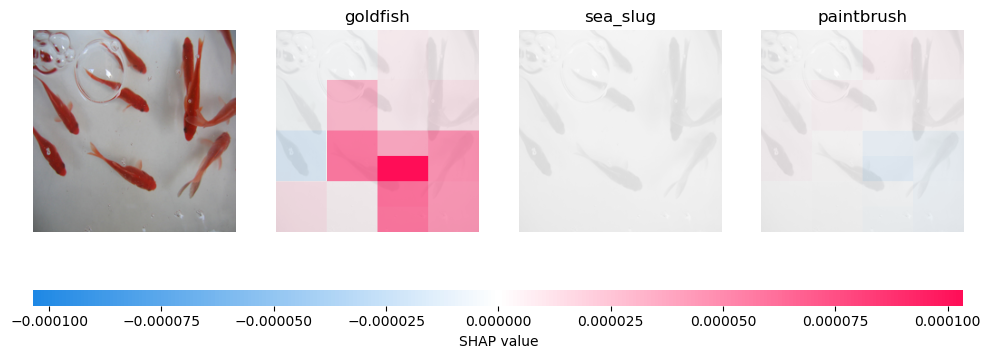

In [21]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from PIL import Image
import shap
import requests

# Load pre-trained model
model = ResNet50(weights="imagenet")

# Getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
class_names = [v[1] for v in requests.get(url).json().values()]

# Python function to get model output; replace this function with your own model function
def f(x):
    tmp = x.copy()
    tmp = preprocess_input(tmp)
    return model(tmp)

# Load and preprocess your image
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Define the masker used to mask out partitions of the input image
masker = shap.maskers.Image("inpaint_telea", (224, 224, 3))

# Create an explainer with the model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# Load your image
# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = 'goldfish.jpg'
img_array = load_and_preprocess_image(image_path)

# Print model raw predictions
predictions = model.predict(img_array)
print("Model raw predictions:", predictions)

# Decode the top 3 predictions to class names
decoded_predictions = decode_predictions(predictions, top=3)
print("Decoded predictions:")
for i, (imagenet_id, class_name, score) in enumerate(decoded_predictions[0]):
    print(f"  {i+1}: {class_name} (score: {score:.4f})")

# Here we explain the image using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(img_array, max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:3])

# Visualize the SHAP values
shap.image_plot(shap_values, img_array)


Decoded predictions:
  1: goldfish (score: 0.9968)
  2: paintbrush (score: 0.0007)
  3: crayfish (score: 0.0004)


PartitionExplainer explainer: 2it [00:14, 14.18s/it]               


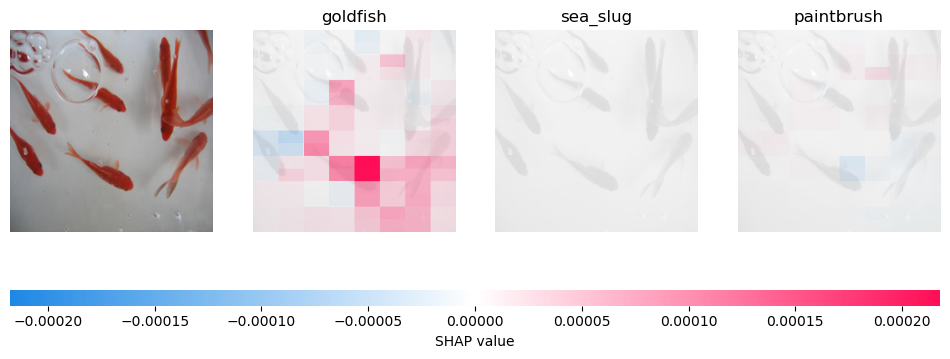

In [39]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from PIL import Image
import shap
import requests

# Load pre-trained model
model = ResNet50(weights="imagenet")

# Getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
class_names = [v[1] for v in requests.get(url).json().values()]

# Python function to get model output; replace this function with your own model function
def f(x):
    tmp = x.copy()
    tmp = preprocess_input(tmp)
    return model(tmp)

# Load and preprocess your image
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def load_img(path):
    img = image.load_img(path, target_size=(224, 224, 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

img, x = load_img('goldfish.jpg')

# Load your image
# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = 'goldfish.jpg'
img_array = load_and_preprocess_image(image_path)

# Define the masker used to mask out partitions of the input image
masker = shap.maskers.Image("inpaint_telea", (224, 224, 3))

# Create an explainer with the model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# Print model raw predictions
predictions = model(x)

# Decode the top 3 predictions to class names
decoded_predictions = decode_predictions(predictions.numpy(), top=3)
print("Decoded predictions:")
for i, (imagenet_id, class_name, score) in enumerate(decoded_predictions[0]):
    print(f"  {i+1}: {class_name} (score: {score:.4f})")

# Here we explain the image using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(img_array, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:3])

# Visualize the SHAP values
shap.image_plot(shap_values, img_array)
